In [4]:
from scipy import integrate
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import array
import scipy as sp
from astropy.cosmology import WMAP9 as cosmo
import glob
import pickle as pickle
from concurrent.futures import ProcessPoolExecutor
import h5py
import yt

In [5]:
def calculate_gamma_e(T):
    gamma_e = []
    for i in T:
        if i <10:
            gamma_e.append(0)
        else:
            t5 = i/1e5
            egamma = 1.17e-10*i**0.5 * np.e**(-177809.1/i)/(1+(t5)**.5)
            gamma_e.append(egamma)
    return gamma_e


def calculate_alpha(T):
    eV2rg =  1.60217648740e-12
    boltzmann_constant = 1.380649e-16
    alpha_list = []
    for i in T:
        T_bar =  float(boltzmann_constant*i/eV2rg)
        alpha = (np.e**(-28.6130338-0.72411256*np.log(T_bar) -2.02604473e-2*np.power(np.log(T_bar),2) - 2.38086188e-3*np.power(np.log(T_bar),3) -3.21260521e-4*np.power(np.log(T_bar),4) - 1.42150291e-5*np.power(np.log(T_bar),5) +4.98910892e-6*np.power(np.log(T_bar),6) + 5.75561414e-7*np.power(np.log(T_bar),7) -1.85676704e-8*np.power(np.log(T_bar),8) - 3.07113524e-9*np.power(np.log(T_bar),9)) )
        alpha_list.append(alpha)
    return alpha_list


In [6]:

rootpath="/data/hqchen/mfp_project/data/"
folder="F_a0.1287_50pMpc/"
zuni=1/0.1452-1
Hz=cosmo.H(zuni).value



def value_array():
    gammalist = []
    dr = []
    losList=glob.glob(rootpath+folder+"lightray*h5")
    gamma_list = []
    for losName in losList[:]:
        lr =yt.load(losName)
        los={}
        los["T"]=lr.r['temperature'].in_units("K").v
        los["nH"]=((lr.r['gas','RT_HVAR_HI']+lr.r['gas','RT_HVAR_HII'])/yt.units.mp).in_units("cm**-3").v
        los["nHe"]=((lr.r['gas','RT_HVAR_HeI']+lr.r['gas','RT_HVAR_HeII']+lr.r['gas','RT_HVAR_HeIII'])/yt.units.mp/4).in_units("cm**-3").v
        los["xHI"]=lr.r['gas','RT_HVAR_HI']/(lr.r['gas','RT_HVAR_HI']+lr.r['gas','RT_HVAR_HII'])
        los["xHeI"]=lr.r['gas','RT_HVAR_HeI']/(lr.r['gas','RT_HVAR_HeI']+lr.r['gas','RT_HVAR_HeII']+lr.r['gas','RT_HVAR_HeIII'])
        los["xHeII"]=lr.r['gas','RT_HVAR_HeII']/(lr.r['gas','RT_HVAR_HeI']+lr.r['gas','RT_HVAR_HeII']+lr.r['gas','RT_HVAR_HeIII'])
        # H_density = [i[2] for i in dset['los.info']]
        #get the HII by subtracting 1- neutral fraction of HI, and then multiply by the total H number density
        # HII_density = np.array(pd.to_numeric(np.multiply([i[2] for i in dset[year]], np.subtract(1,[i[4] for i in dset['los.info']]))))
        # x_HII =  np.subtract(1,[i[4] for i in dset['los.info']])
        # x_HI =  [i[4] for i in dset['los.info']]
        # Temperature = pd.to_numeric([i[7] for i in dset[year]])

        HII_density = np.multiply(los["nH"],np.subtract(1,los["xHI"]))
        x_HII = np.subtract(1,los["xHI"])
        x_HI = los["xHI"]
        gamma_e = calculate_gamma_e(los["T"])
        alpha = calculate_alpha(los["T"])
        frist_part = np.multiply(-HII_density,gamma_e)
        second_part = np.divide(np.multiply(alpha,np.multiply(HII_density,x_HII)),x_HI)
        quasar_background = np.add(frist_part,second_part)
    gamma_list.append(quasar_background)
    return gamma_list

answer = value_array()

# with open('correction_data_frame.pkl', 'wb') as f:
#     pickle.dump(answer, f, protocol=pickle.HIGHEST_PROTOCOL)

yt : [INFO     ] 2024-02-29 01:07:58,606 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2024-02-29 01:07:58,607 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-02-29 01:07:58,608 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2024-02-29 01:07:58,609 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2024-02-29 01:07:58,610 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-02-29 01:07:58,611 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2024-02-29 01:07:58,611 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2024-02-29 01:07:58,612 Parameters: omega_matter              = 0.3035999834537506
yt : [INFO     ] 2024-02-29 01:07:58,612 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-02-29 01:07:58,613 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2024-02-2

yt : [INFO     ] 2024-02-29 01:08:00,274 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2024-02-29 01:08:00,275 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-02-29 01:08:00,276 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2024-02-29 01:08:00,277 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2024-02-29 01:08:00,278 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-02-29 01:08:00,278 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2024-02-29 01:08:00,279 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2024-02-29 01:08:00,279 Parameters: omega_matter              = 0.3035999834537506
yt : [INFO     ] 2024-02-29 01:08:00,280 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-02-29 01:08:00,281 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2024-02-2

In [7]:
val,bine=np.histogram(answer,bins=np.logspace(-15,-10))

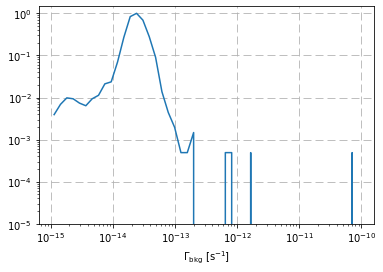

In [8]:

plt.plot((bine[1:]+bine[:-1])/2.,val/np.max(val))
plt.loglog()
plt.grid(dashes=(10,5))
plt.ylim(10e-6)
plt.xlabel(r"$\Gamma_{\rm bkg} \ [\rm s^{-1}]$")
plt.savefig("jf_Gamma_scatter_evolution.pdf")